In [1]:
import pyforest
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from xgboost import XGBClassifier
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import os
from sklearn import tree
import pydotplus
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline


plt.rcParams['figure.figsize'] = [15,12]

In [ ]:
#pip install statsmodels --upgrade

In [ ]:
#pip install pyforest

In [2]:
df = pd.read_csv('ILPD.csv')
df.head()

<IPython.core.display.Javascript object>

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape #Features

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total Bilirubin   583 non-null    float64
 3   Direct Bilirubin  583 non-null    float64
 4   Alkphos           583 non-null    int64  
 5   Sgpt              583 non-null    int64  
 6   Sgpot             583 non-null    int64  
 7   Total Protein     583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A/G Ratio         579 non-null    float64
 10  Selector          583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.isnull().sum()  #Checking for Null Values

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgpot               0
Total Protein       0
Albumin             0
A/G Ratio           4
Selector            0
dtype: int64

In [7]:
df['A/G Ratio'].fillna(df['A/G Ratio'].median(),inplace=True)
df.isnull().sum()   #Fixing of Null Values

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgpot               0
Total Protein       0
Albumin             0
A/G Ratio           0
Selector            0
dtype: int64

In [8]:
df['Selector'] = df['Selector'].map(lambda x:0 if x==2 else 1)
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [10]:
df['Gender'] = df['Gender'].map(lambda x:0 if x=='Female' else 1)
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [11]:
num_cols=df.drop('Selector',axis=1).select_dtypes(exclude='object')
cat_cols=df.select_dtypes(include='object')
print(num_cols.columns)
print(cat_cols.columns)

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos',
       'Sgpt', 'Sgpot', 'Total Protein', 'Albumin', 'A/G Ratio'],
      dtype='object')
Index([], dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

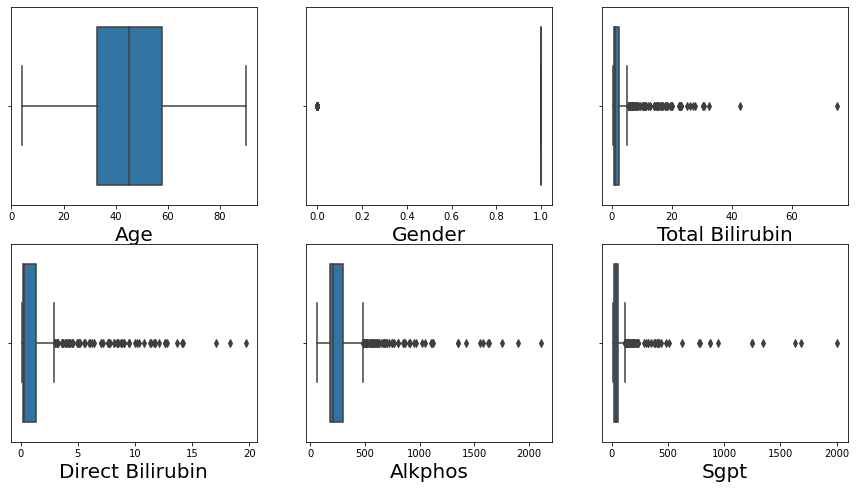

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
for variable, subplot in zip(num_cols.columns, ax.flatten()):
    z = sns.boxplot(x = num_cols[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [13]:
df.head(2)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1


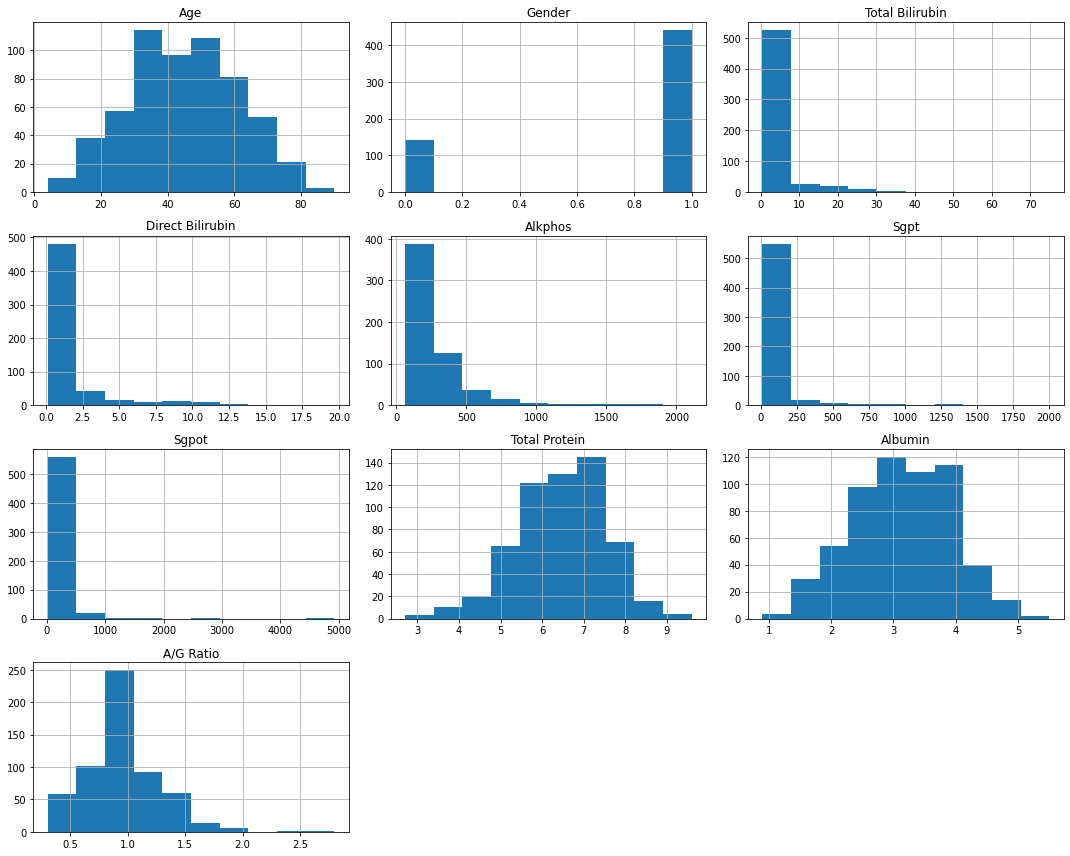

In [16]:
df.drop('Selector',axis=1).hist()
plt.tight_layout()
plt.show()

In [17]:
df.drop('Selector',axis=1).skew()

Age                 -0.029385
Gender              -1.197919
Total Bilirubin      4.907474
Direct Bilirubin     3.212403
Alkphos              3.765106
Sgpt                 6.549192
Sgpot               10.546177
Total Protein       -0.285672
Albumin             -0.043685
A/G Ratio            0.996780
dtype: float64

<IPython.core.display.Javascript object>

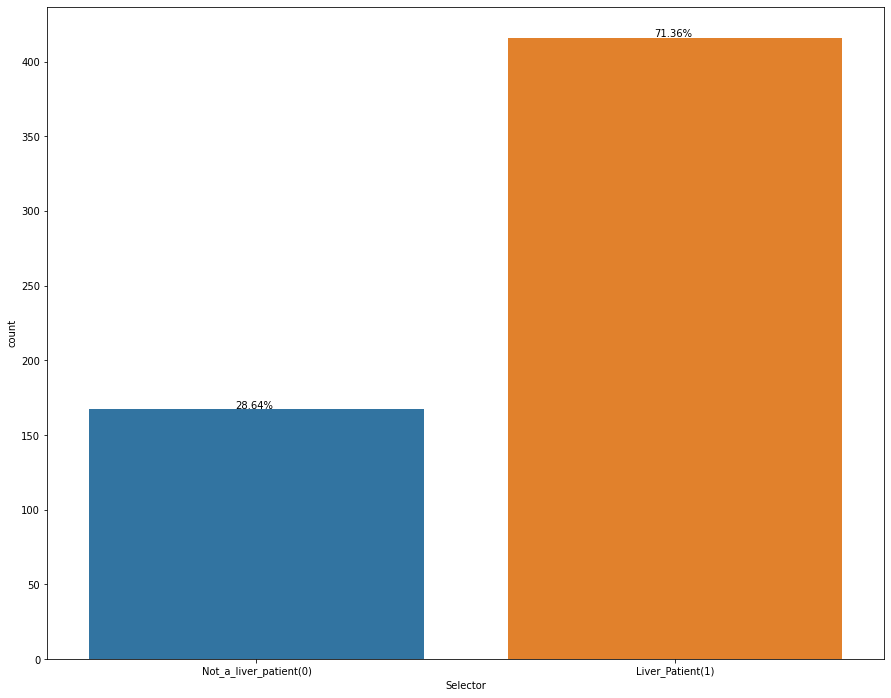

In [18]:
fig = sns.countplot(df['Selector'])
fig.set_xticklabels(['Not_a_liver_patient(0)','Liver_Patient(1)'])
plt.text(x = -0.05, y = df['Selector'].value_counts()[0] + 1, 
         s = str(round((df['Selector'].value_counts()[0])*100/len(df['Selector']),2)) + '%')
plt.text(x = 0.95, y = df['Selector'].value_counts()[1] + 1, 
         s = str(round((df['Selector'].value_counts()[1])*100/len(df['Selector']),2)) + '%')
plt.show()

<IPython.core.display.Javascript object>

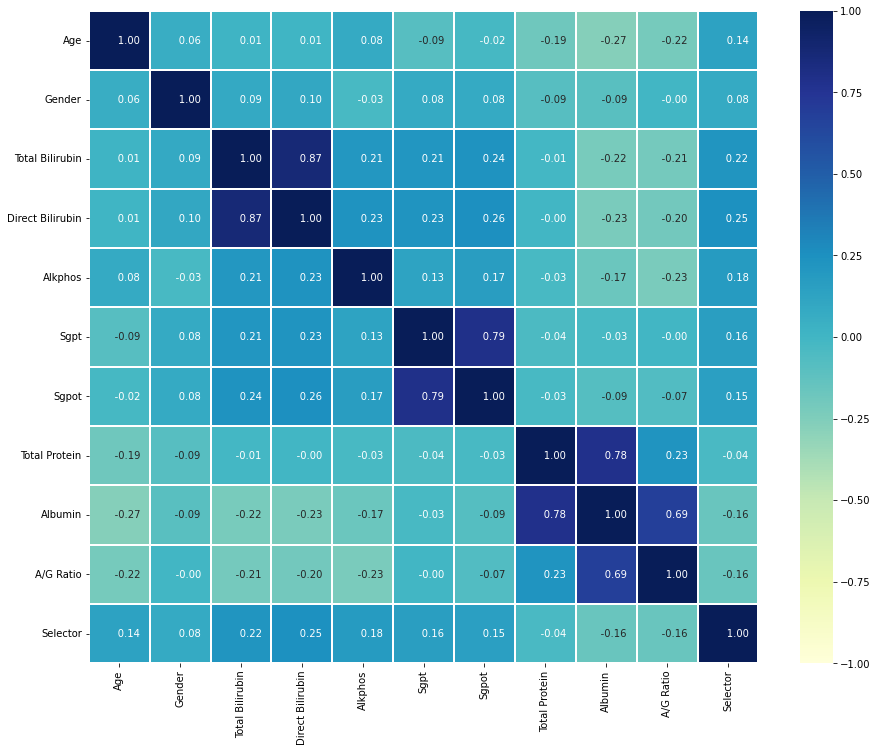

In [19]:
sns.heatmap(df.corr(), 
            annot=True,linewidths = 0.05, vmin = -1 ,
            vmax = 1, cmap = "YlGnBu" , fmt = '10.2f')
plt.show()

In [20]:
df.corr()['Selector'].sort_values(ascending=False)

Selector            1.000000
Direct Bilirubin    0.246046
Total Bilirubin     0.220208
Alkphos             0.184866
Sgpt                0.163416
Sgpot               0.151934
Age                 0.137351
Gender              0.082416
Total Protein      -0.035008
Albumin            -0.161388
A/G Ratio          -0.162144
Name: Selector, dtype: float64

## Imbalanced

In [21]:
Target = df['Selector']
Features = df.drop('Selector', axis=1)

In [ ]:
'''
cTransformer = ColumnTransformer([('encoder',OneHotEncoder(drop='first'),[1])], remainder='passthrough')
cTransformer = cTransformer.fit(Features)
Features_encoded = np.array(cTransformer.transform(Features), dtype=np.float32)
'''

In [22]:
Features.head(2)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


## Imbalanced DataSet

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.2, random_state=15)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (466, 10)
y_train:  (466,)
X_test:  (117, 10)
y_test:  (117,)


In [24]:
models = list()

models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(AdaBoostClassifier())
models.append(GradientBoostingClassifier())
models.append(XGBClassifier())

for mods in models:
    print('Model Name: ', mods)
    clf = mods
    model = clf.fit(X_train, y_train)
    print('Accuracy score: ', accuracy_score(y_test, model.predict(X_test)))
    print('Confusion Matrix:','\n', confusion_matrix(y_test,model.predict(X_test)))
    print('\n')
          

Model Name:  LogisticRegression()
Accuracy score:  0.7777777777777778
Confusion Matrix: 
 [[ 8 21]
 [ 5 83]]


Model Name:  KNeighborsClassifier()
Accuracy score:  0.7350427350427351
Confusion Matrix: 
 [[12 17]
 [14 74]]


Model Name:  GaussianNB()
Accuracy score:  0.5555555555555556
Confusion Matrix: 
 [[28  1]
 [51 37]]


Model Name:  DecisionTreeClassifier()
Accuracy score:  0.6923076923076923
Confusion Matrix: 
 [[ 8 21]
 [15 73]]


Model Name:  RandomForestClassifier()
Accuracy score:  0.7606837606837606
Confusion Matrix: 
 [[ 8 21]
 [ 7 81]]


Model Name:  AdaBoostClassifier()
Accuracy score:  0.7692307692307693
Confusion Matrix: 
 [[12 17]
 [10 78]]


Model Name:  GradientBoostingClassifier()
Accuracy score:  0.7435897435897436
Confusion Matrix: 
 [[ 8 21]
 [ 9 79]]


Model Name:  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
      

In [ ]:
#pip install imblearn

## Balanced

In [25]:
import imblearn

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_sm,  y_sm =  smote.fit_resample(X_train, y_train)
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_sm))

Before SMOTE:  Counter({1: 328, 0: 138})
After SMOTE:  Counter({0: 328, 1: 328})


In [27]:
smote = SMOTE()
X_sm_test,  y_sm_test =  smote.fit_resample(X_test, y_test)
print("Before SMOTE: ", Counter(y_test))
print("After SMOTE: ", Counter(y_sm_test))

Before SMOTE:  Counter({1: 88, 0: 29})
After SMOTE:  Counter({0: 88, 1: 88})


In [29]:
def get_train_report(model):
    train_pred = model.predict(X_sm)
    return(classification_report(y_sm, train_pred))

def get_test_report(model):
    test_pred = model.predict(X_sm_test)
    return(classification_report(y_sm_test, test_pred))

def plot_confusion_matrix(model):
    y_pred = model.predict(X_sm_test)
    cm = confusion_matrix(y_sm_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True,  cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_sm_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_sm_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Liver Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_sm_test, y_pred_prob),4)))
    plt.grid(True)

In [30]:
models = list()
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(AdaBoostClassifier())
models.append(XGBClassifier())

for mods in models:
    print('Model Name: ', mods)
    clf = mods
    model = clf.fit(X_sm,  y_sm)
    print('Accuracy score: ', accuracy_score(y_sm_test, model.predict(X_sm_test)))
    print('Confusion Matrix:','\n', confusion_matrix(y_sm_test,model.predict(X_sm_test)))
    print('\n')
    print("Classification Train report: ")
    train_report = get_train_report(model)
    print(train_report)
    print("Classification Test report: ")
    test_report = get_test_report(model)
    print(test_report)


Model Name:  LogisticRegression()
Accuracy score:  0.75
Confusion Matrix: 
 [[78 10]
 [34 54]]


Classification Train report: 
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       328
           1       0.78      0.59      0.68       328

    accuracy                           0.71       656
   macro avg       0.73      0.71      0.71       656
weighted avg       0.73      0.71      0.71       656

Classification Test report: 
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        88
           1       0.84      0.61      0.71        88

    accuracy                           0.75       176
   macro avg       0.77      0.75      0.75       176
weighted avg       0.77      0.75      0.75       176

Model Name:  KNeighborsClassifier()
Accuracy score:  0.5965909090909091
Confusion Matrix: 
 [[46 42]
 [29 59]]


Classification Train report: 
              precision    recall  f1-score   s

In [31]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_sm,y_sm)

In [32]:
y_pred = gnb_model.predict(X_sm_test)
cfm=confusion_matrix(y_sm_test,y_pred)
acc=accuracy_score(y_sm_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.69


In [33]:
print(get_train_report(gnb_model))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       328
           1       0.90      0.42      0.57       328

    accuracy                           0.68       656
   macro avg       0.76      0.68      0.66       656
weighted avg       0.76      0.68      0.66       656



In [34]:
print(get_test_report(gnb_model))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        88
           1       0.90      0.42      0.57        88

    accuracy                           0.69       176
   macro avg       0.76      0.69      0.66       176
weighted avg       0.76      0.69      0.66       176



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

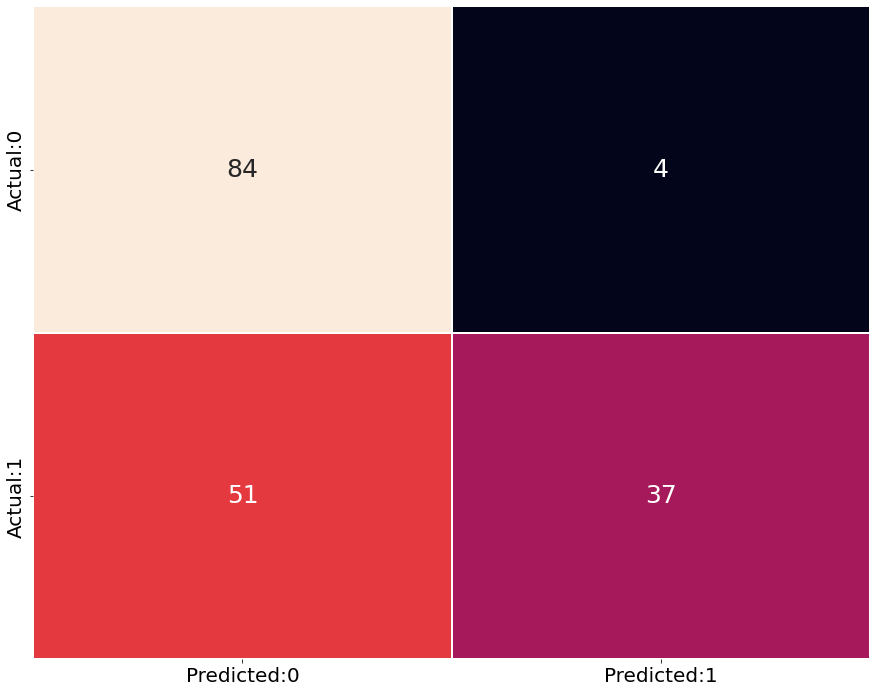

In [35]:
plot_confusion_matrix(gnb_model)

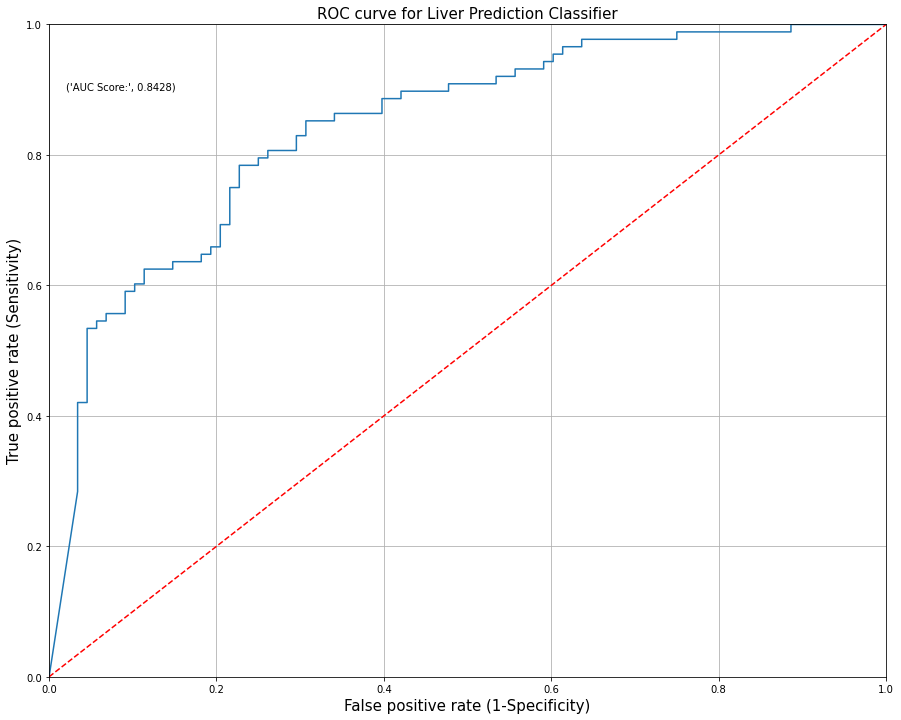

In [36]:
plot_roc(gnb_model)

## ADa boosting

In [37]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_sm, y_sm)

AdaBoostClassifier()

In [38]:
y_pred = ada_model.predict(X_sm_test)
cfm=confusion_matrix(y_sm_test,y_pred)
acc=accuracy_score(y_sm_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.73


In [39]:
print(get_train_report(ada_model))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       328
           1       0.89      0.76      0.82       328

    accuracy                           0.83       656
   macro avg       0.84      0.83      0.83       656
weighted avg       0.84      0.83      0.83       656



In [40]:
print(get_test_report(ada_model))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        88
           1       0.72      0.75      0.73        88

    accuracy                           0.73       176
   macro avg       0.73      0.73      0.73       176
weighted avg       0.73      0.73      0.73       176



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

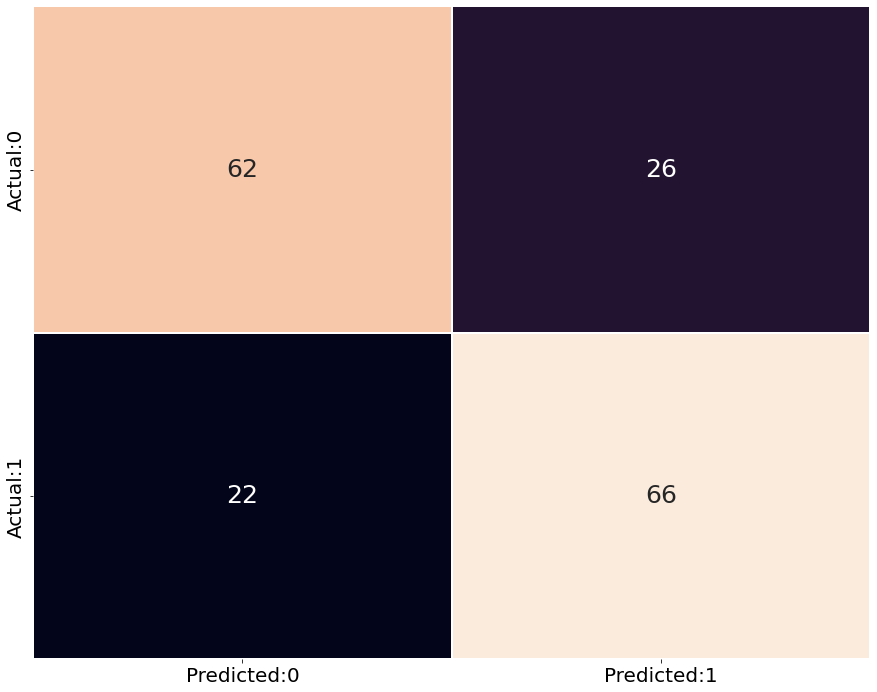

In [41]:
plot_confusion_matrix(ada_model)

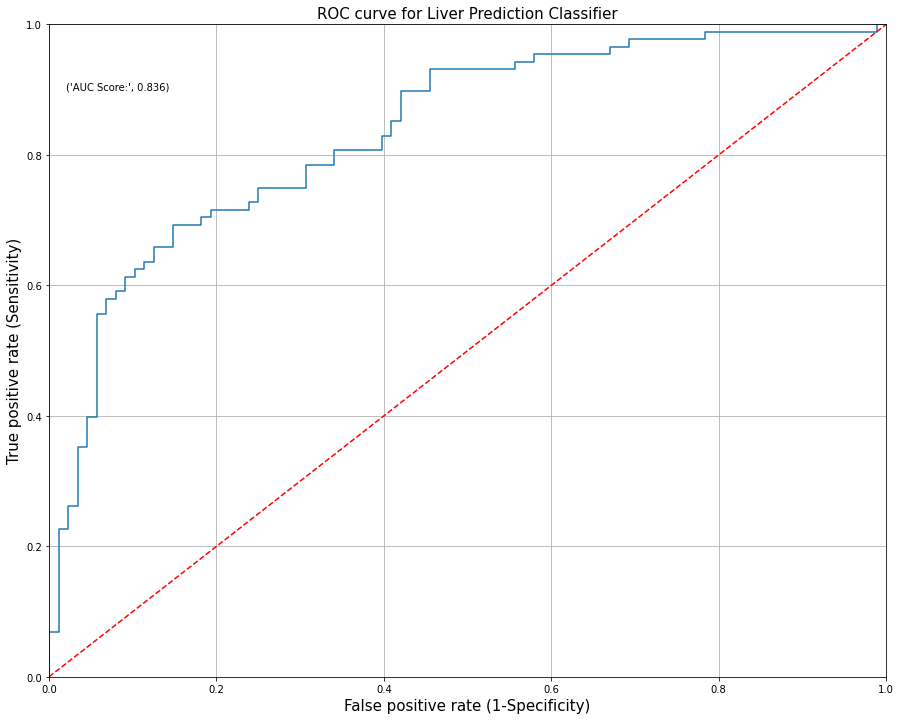

In [42]:
plot_roc(ada_model)

## Parameter tuning

In [43]:
tuning_parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'n_estimators': range(10,50)}]
                     
ada_x_model = AdaBoostClassifier(random_state=10)

ada_grid = GridSearchCV(estimator = ada_x_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

ada_grid.fit(X_sm, y_sm)

print('Best parameters for AdaBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for AdaBoost classifier:  {'learning_rate': 0.5, 'n_estimators': 42} 



In [87]:
tuned_ada_model = AdaBoostClassifier(n_estimators = 37,learning_rate=0.4, random_state = 10)
tuned_ada_model.fit(X_sm, y_sm)

AdaBoostClassifier(learning_rate=0.4, n_estimators=37, random_state=10)

In [88]:
y_pred = tuned_ada_model.predict(X_sm_test)
cfm=confusion_matrix(y_sm_test,y_pred)
acc=accuracy_score(y_sm_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.73


In [89]:
print(get_train_report(tuned_ada_model))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       328
           1       0.87      0.68      0.76       328

    accuracy                           0.79       656
   macro avg       0.81      0.79      0.79       656
weighted avg       0.81      0.79      0.79       656



In [90]:
print(get_test_report(tuned_ada_model))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        88
           1       0.75      0.68      0.71        88

    accuracy                           0.73       176
   macro avg       0.73      0.73      0.73       176
weighted avg       0.73      0.73      0.73       176



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

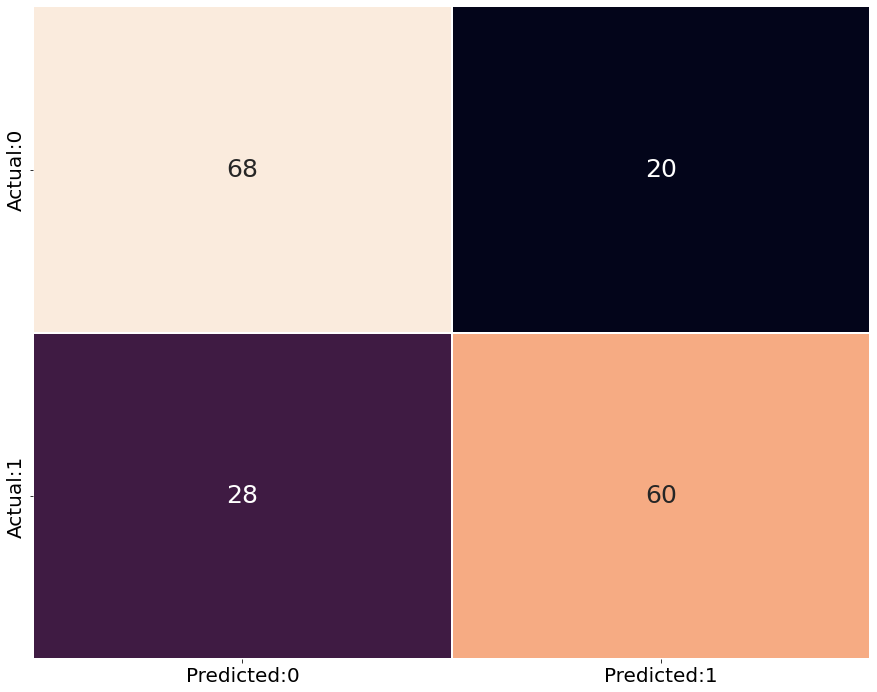

In [91]:
plot_confusion_matrix(tuned_ada_model)

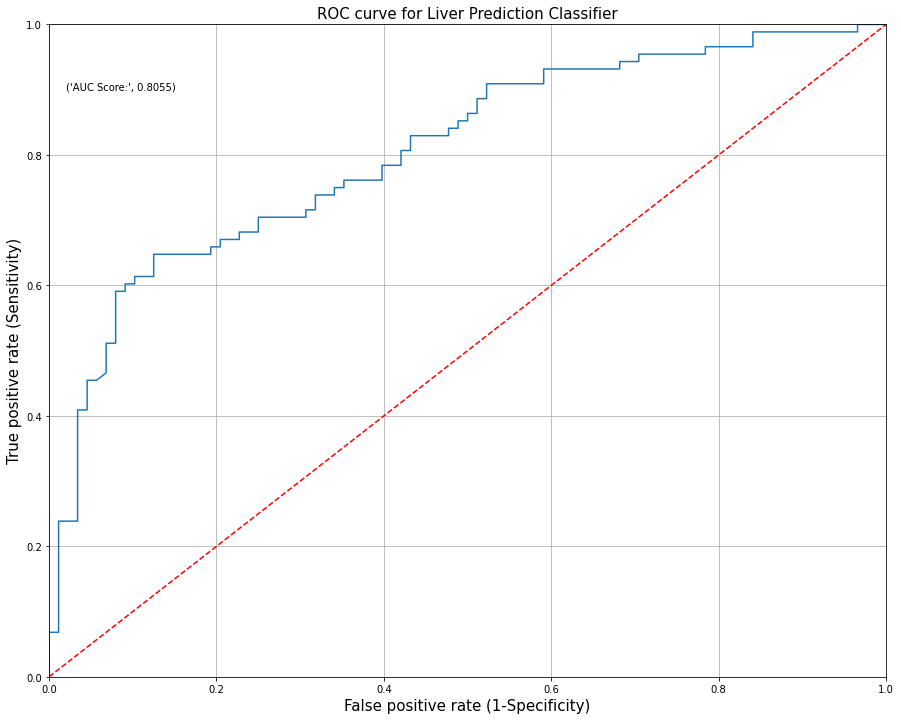

In [92]:
plot_roc(tuned_ada_model)

In [93]:
import pickle
file = open('gnb_model.pkl','wb')
pickle.dump(gnb_model,file)

In [94]:
import pickle
file = open('tuned_ada_model.pkl','wb')
pickle.dump(tuned_ada_model,file)

In [96]:
Features.columns

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos',
       'Sgpt', 'Sgpot', 'Total Protein', 'Albumin', 'A/G Ratio'],
      dtype='object')

In [110]:
Age = int(input('Enter the Age: '))
Gender = int(input('Enter the Gender (0->Male, 1-Female): '))
Total_Bilirubin = float(input('Enter the Total Bilirubin: '))
Direct_Bilirubin = float(input('Enter the Direct Bilirubin: '))
Alkphos = int(input('Enter the Alkphos: '))
Sgpt = int(input('Enter the Sgpt ( Alanine aminotransferase ): '))
Sgpot = int(input('Enter the Sgpot: '))
Total_Protein = float(input('Enter the Total Protein: '))
Albumin = float(input('Enter the Albumin: '))
AG_Ratio = float(input('Enter the A/G Ratio: '))

to_predict = [[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,Sgpt,Sgpot,Total_Protein,Albumin,AG_Ratio]]
#to_predict = np.array(to_predict)
#to_predict = to_predict.reshape(1,10)
#to_predict = np.array(cTransformer.transform(to_predict), dtype=np.float32)
estimated_price = gnb_model.predict(to_predict)
print('Estimated Result: ', str(np.round(estimated_price[0],2)))

Enter the Age: 40
Enter the Gender (0->Male, 1-Female): 1
Enter the Total Bilirubin: 0.9
Enter the Direct Bilirubin: 0.3
Enter the Alkphos: 293
Enter the Sgpt ( Alanine aminotransferase ): 232
Enter the Sgpot: 245
Enter the Total Protein: 6.8
Enter the Albumin: 3.1
Enter the A/G Ratio: 0.8


<IPython.core.display.Javascript object>

Estimated Result:  1


In [111]:
Age = int(input('Enter the Age: '))
Gender = int(input('Enter the Gender (0->Male, 1-Female): '))
Total_Bilirubin = float(input('Enter the Total Bilirubin: '))
Direct_Bilirubin = float(input('Enter the Direct Bilirubin: '))
Alkphos = int(input('Enter the Alkphos: '))
Sgpt = int(input('Enter the Sgpt ( Alanine aminotransferase ): '))
Sgpot = int(input('Enter the Sgpot: '))
Total_Protein = float(input('Enter the Total Protein: '))
Albumin = float(input('Enter the Albumin: '))
AG_Ratio = float(input('Enter the A/G Ratio: '))

to_predict = [[Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,Sgpt,Sgpot,Total_Protein,Albumin,AG_Ratio]]

estimated_price = tuned_ada_model.predict(to_predict)
print('Estimated Result: ', str(np.round(estimated_price[0],2)))

Enter the Age: 40
Enter the Gender (0->Male, 1-Female): 1
Enter the Total Bilirubin: 0.9
Enter the Direct Bilirubin: 0.3
Enter the Alkphos: 293
Enter the Sgpt ( Alanine aminotransferase ): 232
Enter the Sgpot: 245
Enter the Total Protein: 6.8
Enter the Albumin: 3.1
Enter the A/G Ratio: 0.8


<IPython.core.display.Javascript object>

Estimated Result:  1
